# Archivo Respuestas Datos Oficiales

**Presentado por:** <br>
- Geoc. Juan Camilo Burgos Flórez
- Geoc. Luis Fernando Chacón 
- Geoc. Ing. Carlos Fabián Sánchez Suárez

-----

## Desarrollo de preguntas sobre datos oficiales

<br>A continuación se presentan las respuestas correspondientes a los datos oficiales de la ANH. Se indica la pregunta con su respectivo procedimiento de desarrollo, su gráfica para soportar el resultado y visualización de los datos, y una corta respuesta o justificación en cada una de las preguntas.<br>

In [1]:
# Librerías a importar

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Establece la conexión con la base de datos y trae el archivo con la tabla de datos de producción

pd.options.display.float_format = '{:.2f}'.format      # Esta línea ajusta el formato a 2 decimales
engine = create_engine("sqlite:///HackathonSPE.db")
sqlite_connection = engine.connect()                  

cnx = sqlite3.connect('HackathonSPE.db')

-----

<strong> PREGUNTA 1. </strong> Indique el top 5 de los campos con mayor porducción de petróleo durante el año 2020

,Campo,ProdTotal2020
1,RUBIALES,857001.07
2,CASTILLA,537068.14
3,CHICHIMENE,388023.81
4,CASTILLA NORTE,380005.77
5,QUIFA,304783.67


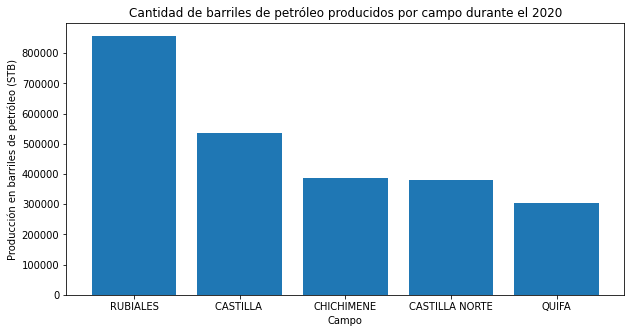

In [3]:
query = "SELECT Campo, sum(Produccion) as ProdTotal2020 FROM TablaProduccion \
                        WHERE Año=2020\
                        GROUP BY Campo\
                        ORDER BY ProdTotal2020 DESC \
                        LIMIT 5 "

top5_campos2020 = pd.read_sql_query(query, cnx)
top5_campos2020.index = top5_campos2020.index +1

plt.figure(figsize=(10,5))
plt.bar(top5_campos2020["Campo"], top5_campos2020["ProdTotal2020"])
plt.xlabel('Campo')
plt.ylabel('Producción en barriles de petróleo (STB)')
plt.title('Cantidad de barriles de petróleo producidos por campo durante el 2020')
top5_campos2020

<strong>Respuesta: </strong> De acuerdo con los resultados podemos ver, en la tabla, el top 5 de los campos que han reportado mayor producción durante el año 2020, donde el que más lo ha hecho ha sido el campo Rubiales con más de 850.000 barriles de petróleo producidos

-----

<strong>Pregunta 2.</strong> Indique cuántas y cuáles compañias han reportado producción en más de 5 campos en Casanare en el año 2018 

,Operadora,CantCampos
1,PERENCO COLOMBIA LIMITED,34
2,Frontera Energy Colombia Corp Sucursal Colombia,34
3,GEOPARK COLOMBIA S.A.S.,20
4,ECOPETROL S.A.,9
5,PAREX RESOURCES COLOMBIA LTD. SUCURSAL,7
6,NEW GRANADA ENERGY CORPORATION SUCURSAL COLOMBIA,6
7,COLOMBIA ENERGY DEVELOPMENT CO,6
8,CEPSA COLOMBIA S.A.,6


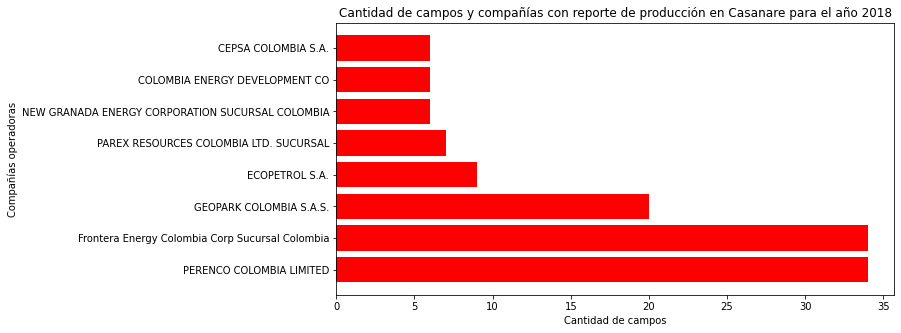

In [4]:
query1 ="SELECT x.Operadora, count(x.Campo) as CantCampos FROM (\
                                            SELECT DISTINCT Operadora, Campo FROM TablaProduccion\
                                                     WHERE Departamento ='CASANARE' AND Año = 2018\
                                                     ORDER BY Operadora) as x\
         GROUP BY x.Operadora HAVING CantCampos > 5\
         ORDER BY CantCampos DESC"

casanare_2018 =  pd.read_sql_query(query1, cnx).reset_index(drop=True)
casanare_2018.index = casanare_2018.index +1

plt.figure(figsize=(10,5))
plt.barh(casanare_2018["Operadora"], casanare_2018["CantCampos"], color='r')
plt.xlabel('Cantidad de campos')
plt.ylabel('Compañías operadoras')
plt.title('Cantidad de campos y compañías con reporte de producción en Casanare para el año 2018')
casanare_2018

<strong>Respuesta: </strong> De acuerdo con los resultados podemos ver que tan solo 8 de las 52 empresas operadoras (que aparecen en los reportes de producción oficiales) reportaron producción de petróleo de más de 5 campos en Casanare en el año 2018. De estas, se observa que tanto Perenco Colombia Limited como Frontera Energy Colombia, fueron las compañías que más campos trabajaron en el departamento, con un conteo de 34 cada una.

-----

<strong>Pregunta 3:</strong> Indique los 5 contratos con la más alta producción de MMstb en el año 2018

,Contrato,Produccion,Departamento
1,CUBARRAL,2.18,META
2,RUBIALES,1.43,META
3,LLA 34,0.73,CASANARE
4,QUIFA,0.55,META
5,LA CIRA INFANTAS,0.54,SANTANDER


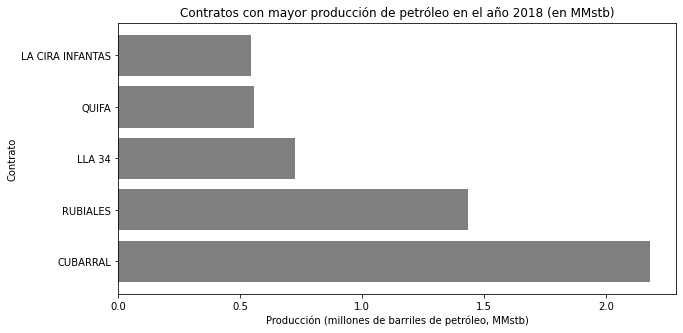

In [5]:
query2="SELECT Contrato, sum(Produccion)/1000000 as Produccion, Departamento FROM TablaProduccion\
            WHERE Año = 2018\
            GROUP BY Contrato\
            ORDER BY Produccion DESC\
            LIMIT 5"
            
altaprod_2018 =  pd.read_sql_query(query2, cnx).reset_index(drop=True)
altaprod_2018.index = altaprod_2018.index +1

plt.figure(figsize=(10,5))
plt.barh(altaprod_2018["Contrato"], altaprod_2018["Produccion"], color ='grey')
plt.ylabel('Contrato')
plt.xlabel('Producción (millones de barriles de petróleo, MMstb)')
plt.title('Contratos con mayor producción de petróleo en el año 2018 (en MMstb)')
altaprod_2018   

<strong>Respuesta: </strong> Con los resultados anteriormente descritos es posible reconocer los 5 contratos con mayor producción de petróleo (en MMstb) en el año 2018. El contrato Cubarral es aquél que presenta el mayor registro con más de 2 millones de barriles producidos; además, los 4 primeros contratos se celebran en la cuenca de los Llanos Orientales, mientras que el de la Cira Infantas pertenece a la cuenca del Valle Medio del Magdalenda   

-----

<strong>Pregunta 4:</strong> Ordene de mayor a menor las 10 operadoras con mayor producción en el mes de agosto 2019

,Operadora,Produccion
1,ECOPETROL S.A.,473986.41
2,Frontera Energy Colombia Corp Sucursal Colombia,81441.68
3,GEOPARK COLOMBIA S.A.S.,69154.42
4,OCCIDENTAL DE COLOMBIA LLC,53299.12
5,EQUION ENERGÍA LIMITED,34950.01
6,GRAN TIERRA ENERGY COLOMBIA LTD,29555.20
7,MANSAROVAR ENERGY COLOMBIA LTD,25256.75
8,HOCOL S.A.,19614.02
9,PAREX RESOURCES COLOMBIA LTD. SUCURSAL,15727.97
10,CEPSA COLOMBIA S.A.,12702.09


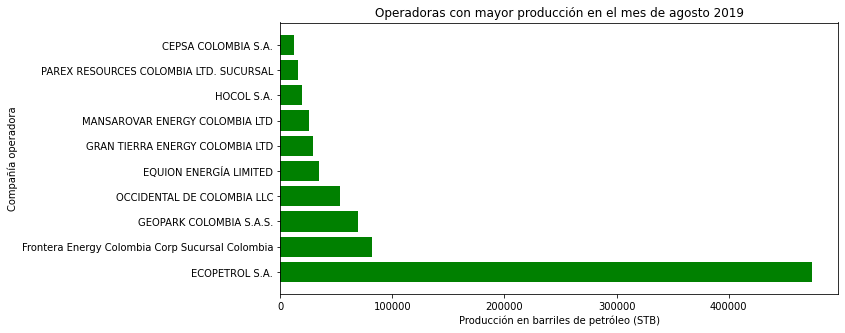

In [6]:
query3 = " SELECT Operadora, sum(Produccion) as Produccion FROM TablaProduccion\
                    WHERE Año = 2019 AND Mes = 'Agosto'\
                    GROUP BY Operadora\
                    ORDER BY Produccion DESC\
                    LIMIT 10"

operadorastop_2019 =  pd.read_sql_query(query3, cnx).reset_index(drop=True)
operadorastop_2019.index = operadorastop_2019.index +1

plt.figure(figsize=(10,5))
plt.barh(operadorastop_2019["Operadora"], operadorastop_2019["Produccion"], color='green')
plt.xlabel('Producción en barriles de petróleo (STB)')
plt.ylabel('Compañía operadora')
plt.title('Operadoras con mayor producción en el mes de agosto 2019')
operadorastop_2019

In [7]:
print(round(473986.41*100/operadorastop_2019["Produccion"].sum(), 2), '%') # Producción de Ecopetrol

58.11 %


<strong>Respuesta: </strong> A partir del resultado podemos observar que Ecopetrol fue la compañía que más recogió producción de petróleo durante el mes de agosto de 2019, esta producción reportada corresponde con el 58.11 % de la producción reportada por **este top 10** de empresas operadoras, con cerca de los 480.000 barriles de petróleo.

-----

<strong>Pregunta 5:</strong> Realice un análisis comparativo de la producción de los dos primeros trimestres de los años 2019 y 2020. Trimestres: Enero a Marzo, Abril a Junio

In [8]:
query4 = "SELECT sum(Produccion) as Produccion, Año, (CASE\
                                         WHEN Mes IN ('Enero', 'Febrero','Marzo') THEN 1\
                                         WHEN Mes IN ('Abril', 'Mayo','Junio') THEN 2\
                                         END) as Trimestre\
                        FROM TablaProduccion\
                        WHERE Año IN (2019, 2020)\
                        GROUP BY Año, Trimestre HAVING Trimestre IN (1,2)"

trimestre =  pd.read_sql_query(query4, cnx).reset_index(drop=True)
trimestre.index = trimestre.index +1

trimestre

,Produccion,Año,Trimestre
1,2676538.43,2019,1
2,2677717.45,2019,2
3,2619416.71,2020,1
4,2258345.28,2020,2


<strong>Respuesta: </strong> A partir de estos datos es posible realizar diferentes comparaciones. Primero, de acuerdo con la tabla mostrada en la parte superior, es posible ver que la producción durante los dos primeros semsetres del año 2019 fue superior comparada con el año 2020 en los mismos meses. Segundo, comparando cada trimestre en los ambos años, es posible reconocer que cada uno del 2019 fue superior en comparación con el 2020 (i.e. el primer trimestre del año 2019 tuvo más producción que el primer trimestre del 2020, igual que el segundo). 

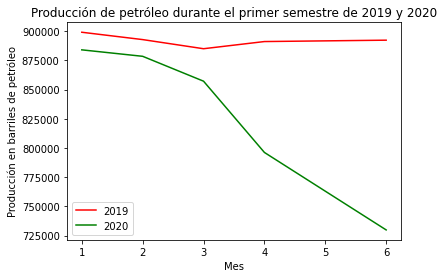

In [9]:
query5 = "SELECT sum(Produccion) as Produccion, Año, Mes FROM TablaProduccion\
                WHERE Año IN (2019, 2020)\
                    AND Mes IN ('Enero', 'Febrero', 'Marzo', 'Abril', 'Junio')\
                GROUP BY Año, Mes"


months = {"Enero":1, "Febrero":2, "Marzo":3, "Abril":4, "Mayo":5, "Junio":6}

trim2 =  pd.read_sql_query(query5, cnx).reset_index(drop=True)
trim2.index = trim2.index +1
trim2["Mes"] = trim2["Mes"].replace(months)

trim2 = trim2.groupby(["Año","Mes"]).sum().reset_index()

data2019 = trim2[trim2["Año"].apply(lambda x: x==2019)]
data2020 = trim2[trim2["Año"].apply(lambda x: x==2020)]

    
plt.figure()
plt.plot(data2019["Mes"], data2019["Produccion"], c='r', label = '2019')
plt.plot(data2020["Mes"], data2020["Produccion"], c='g', label = '2020')
plt.xlabel('Mes')
plt.ylabel('Producción en barriles de petróleo')
plt.title('Producción de petróleo durante el primer semestre de 2019 y 2020')
plt.legend()

La gráfica aquí representada da una imagen que apoya lo mencionado anteriormente, se puede apreciar que durante este periodo de tiempo (primer semestre de cada año) la producción en el 2019 fue siempre superior en comparación con la del 2020. Adicionalmente, notamos como a partir de Marzo (mes 3) la producción disminuye de manera abrupta y con una mayor pendiente; esto va directamente asociado con la situación actual en Colombia y el mundo, que debido a la propagación del Covid-19 se vio muy afectada la industria de hidrocarburos en Colombia. Por esto, durante el 2020 se tiene una notoria reducción en la producción de petróleo, dado el paro de actividades extractivas por cierre/suspensión de operaciones en los diferentes campos del país.

-------